# Preprocessing Tutorial  
This tutorial focuses on how to utilize dynamo to preprocess data. In the new version, we make `Preprocessor` class to allow you to freely explore different preprocessing recipes whose step parameters that can be configured inside `Preprocessor`. Existing recipes in preprocessor includes monocle, pearson residual, seurat and sctransform. Moreover, you can replace each preprocessing step with your own implementation with ease. For instance, `Preprocessor`'s monocle pipeline contains `filter_cells_by_outliers`, `filter_genes_by_outliers`, `normalize_by_cells`, `select_genes` and other steps. You can replace the implementation and default monocle parameters passed in to these functions by replacing or changing attributes of `Preprocessor`.

In older versions, dynamo offer several recipes, among which `recipe_monocle` is  a basic function as a building block of other recipes. You can still use these functions to preprocess data.  

`Preprocessor` provides users with `config_monocle_recipe` and other `config_*_recipes` methods to help you reproduce different preprocessor results and integrate with your newly developed preprocessing algorithms.

Import packages

In [2]:
import dynamo as dyn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from dynamo.configuration import DKM
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
dyn.configuration.set_figure_params('dynamo', background='white')
dyn.get_all_dependencies_version()

package umap-learn typing-extensions    tqdm statsmodels setuptools  \
version      0.5.6            4.11.0  4.66.2      0.14.2     69.5.1   

package session-info seaborn   scipy pynndescent pre-commit pandas openpyxl  \
version        1.0.0  0.13.2  1.11.4      0.5.12      3.7.1  1.5.3    3.1.4   

package numdifftools   numba networkx matplotlib loompy leidenalg  igraph  \
version       0.9.41  0.58.1      3.3      3.9.2  3.0.7    0.10.2  0.10.8   

package get-version dynamo-release colorcet anndata  
version       3.5.5       1.4.2rc1    3.1.0  0.10.7

## Glossary of keys generated during preprocessing


- `adata.obs.pass_basic_filter`: a list of boolean variables indicating whether cells pass certain basic filters. In monocle recipe, the basic filtering is based on thresholding of expression values.
- `adata.var.pass_basic_filter`: a list of boolean variables indicating whether genes pass certain basic filters. In monocle recipe, the basic filtering is based on thresholding of expression values.
- `adata.var.use_for_pca`: a list of boolean variables used during PCA dimension reduction and following downstream analysis. In many recipes, this key is equivalent to highly variable genes.
- `adata.var.highly_variable_scores`: a list of float number scores indicating how variable each gene is, typically generated during gene feature selection (`preprocessor.select_genes`). Note only part of recipes do not have this highly variable scores. E.g. `seuratV3` recipe implemented in dynamo does not have highly variable scores due to its thresholding nature. 
- `adata.layers.X_spliced`: unspliced expression matrix after normalization used in downstream computation
- `adata.layers.X_unspliced`: spliced expression matrix after normalization used in downstream computation
- `adata.obsm.X_pca`: normalized X after PCA transformation
  

## Using Predefined (default) Recipe Configurations in Preprocessor

In [4]:
adata = dyn.sample_data.zebrafish()

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> File ./data/zebrafish.h5ad already exists.


Read zebrafish data

In [5]:
adata = dyn.sample_data.zebrafish()
celltype_key = "Cell_type"
figsize = (10, 10)

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> File ./data/zebrafish.h5ad already exists.


Import `Preprocessor` class

In [6]:
from dynamo.preprocessing import Preprocessor

`dynamo` provides users with `preprocess_adata`, a simple wrapper, to apply preprocess steps with default settings. In this section, we will go through recipes in `preprocess_adata` and observe how preprocess methods can influence visualization results. 


### Applying Monocle Recipe 

**TODO: remake the flowchart**
![monocle-flowchart](./images/normalization-monocle-dynamo-flow-chart.png)

In [7]:
preprocessor = Preprocessor()
preprocessor.preprocess_adata(adata, recipe="monocle")

# Alternative
# preprocessor.config_monocle_recipe(adata)
# preprocessor.preprocess_adata_monocle(adata)

default_preprocessor_monocle_adata = adata # save for usage later

|-----> Running monocle preprocessing pipeline...
|-----------> filtered out 14 outlier cells
|-----------> filtered out 12746 outlier genes
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> [Preprocessor-monocle] completed [6.8642s]


|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [20.2954s]
|-----------> plotting with basis key=X_umap
|-----------> skip filtering Cell_type by stack threshold when stacking color because it is not a numeric type


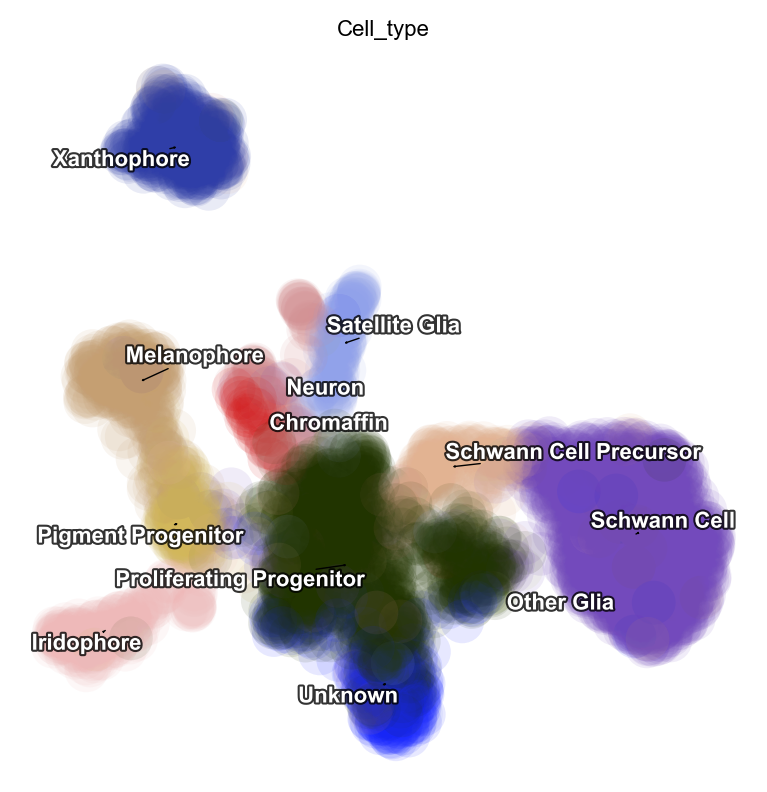

In [8]:
dyn.tl.reduceDimension(adata, basis="pca")
dyn.pl.umap(adata, color=celltype_key, figsize=(4,4),
           adjust_legend=True)

### Applying Pearson Residuals Recipe

In [9]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
# preprocessor.config_pearson_residuals_recipe(adata)
# preprocessor.preprocess_adata_pearson_residuals(adata)
preprocessor.preprocess_adata(adata, recipe="pearson_residuals")

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> File ./data/zebrafish.h5ad already exists.
|-----> gene selection on layer: X
|-----> extracting highly variable genes
|-----------> filtered out 350 outlier genes
|-----> applying Pearson residuals to layer <X>
|-----> replacing layer <X> with pearson residual normalized data.
|-----> [pearson residual normalization for X] completed [0.8654s]
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> [Preprocessor-pearson residual] completed [6.6979s]


|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [8.9161s]
|-----------> plotting with basis key=X_umap
|-----------> skip filtering Cell_type by stack threshold when stacking color because it is not a numeric type


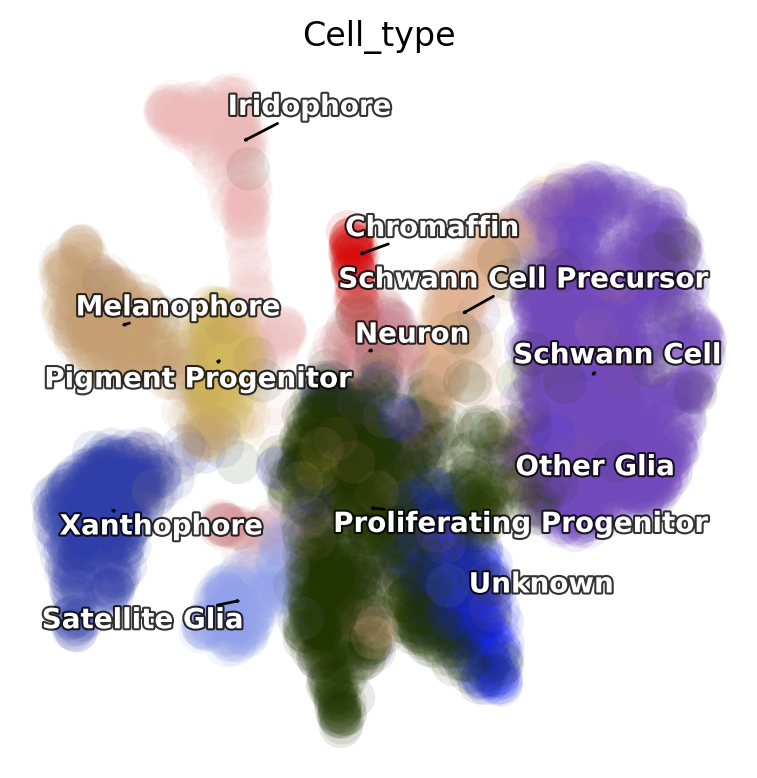

In [10]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key,figsize=(4,4),
           adjust_legend=True)

### Applying Sctransform Recipe

In [11]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
# preprocessor.config_sctransform_recipe(adata)
# preprocessor.preprocess_adata_sctransform(adata)
preprocessor.preprocess_adata(adata, recipe="sctransform")

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> File ./data/zebrafish.h5ad already exists.
|-----> Running Sctransform recipe preprocessing...
|-----------> filtered out 14 outlier cells
|-----------> filtered out 12410 outlier genes
|-----? Sctransform recipe will subset the data first with default gene selection function for efficiency. If you want to disable this, please perform sctransform without recipe.
|-----> sctransform adata on layer: X
|-----------> set sctransform results to adata.X
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> [Preprocessor-sctransform] completed [24.8282s]


|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [9.8305s]
|-----------> plotting with basis key=X_umap
|-----------> skip filtering Cell_type by stack threshold when stacking color because it is not a numeric type


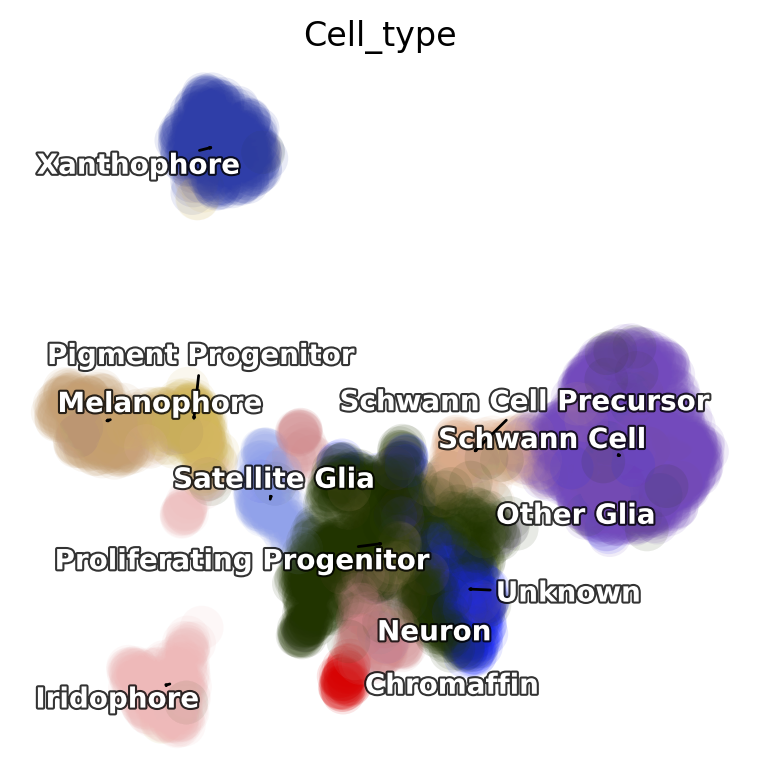

In [12]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key, figsize=(4,4),
           adjust_legend=True)

### Applying Seurat Recipe

In [13]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
# preprocessor.config_seurat_recipe()
# preprocessor.preprocess_adata_seurat(adata)
preprocessor.preprocess_adata(adata, recipe="seurat")

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> File ./data/zebrafish.h5ad already exists.
|-----> Running Seurat recipe preprocessing...
|-----------> filtered out 14 outlier cells
|-----------> filtered out 11388 outlier genes
|-----> select genes on var key: pass_basic_filter
|-----------> choose 2000 top genes
|-----> number of selected highly variable genes: 2000
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> [Preprocessor-seurat] completed [8.7108s]


|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [9.7173s]
|-----------> plotting with basis key=X_umap
|-----------> skip filtering Cell_type by stack threshold when stacking color because it is not a numeric type


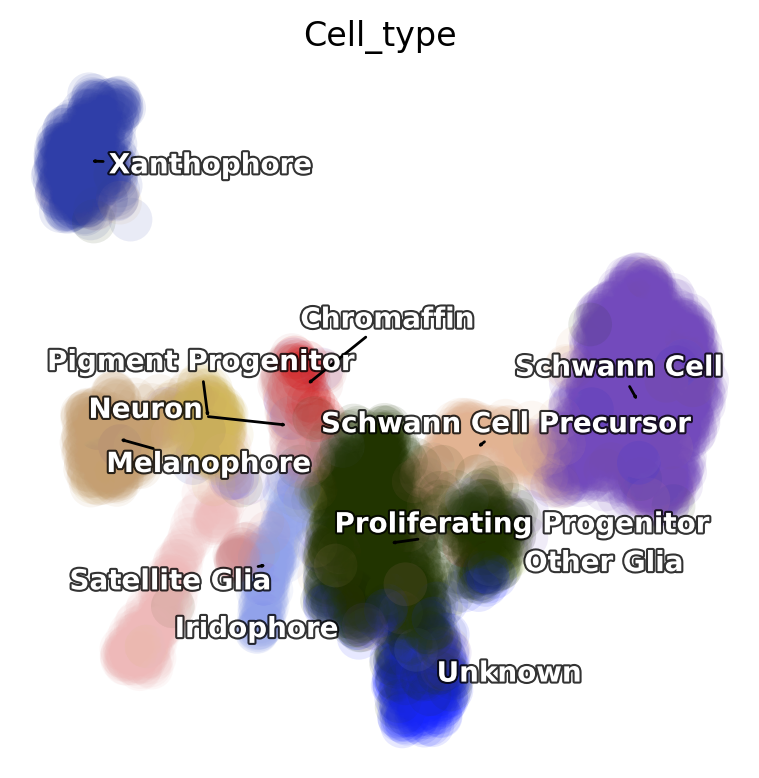

In [14]:
dyn.tl.reduceDimension(adata)
dyn.pl.umap(adata, color=celltype_key, figsize=(4,4),
           adjust_legend=True)

## Customize Function Parameters Configured in Preprocessor
Here we are gong to use recipe monocle as an example. In recipe monocle's selection genes function, we can set recipe to be `dynamo_monocle`, `seurat`, `svr` and others to apply different criterions to select genes. We can set preprocesor's `select_genes_kwargs` to pass wanted parameters. In the example below, the default parameter is `recipe=dynmoa_monocle`. We can change it to `seurat` and add other contraint parameters as well.

Let's call `preprocessor.config_monocle_recipe` to set `monocle` recipe preprocessing steps and corresponding function parameters. The default constructor parameters of `Preprocessor` for preprocessing are from our monocle recipe used in `dynamo` papers.

In [22]:
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
preprocessor.config_monocle_recipe(adata)

|-----> Downloading data to ./data/zebrafish.h5ad
|-----> File ./data/zebrafish.h5ad already exists.


`preprocessor.select_genes_kwargs` contains arguments that will be passed to `select_genes` step.

In [23]:
preprocessor.select_genes_kwargs

{'n_top_genes': 2000, 'SVRs_kwargs': {'relative_expr': False}}

In [25]:
preprocessor.select_genes_kwargs = dict(
    n_top_genes=2000,
    SVRs_kwargs={'relative_expr': False}
)
preprocessor.select_genes_kwargs


{'n_top_genes': 2000, 'SVRs_kwargs': {'relative_expr': False}}

|-----> Running monocle preprocessing pipeline...
|-----------> filtered out 14 outlier cells
|-----------> filtered out 12746 outlier genes
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> [Preprocessor-monocle] completed [6.6950s]
|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [6.7069s]
|-----------> plotting with basis key=X_umap
|-----------> skip filtering Cell_type by stack threshold when stacking color because it is not a numeric type


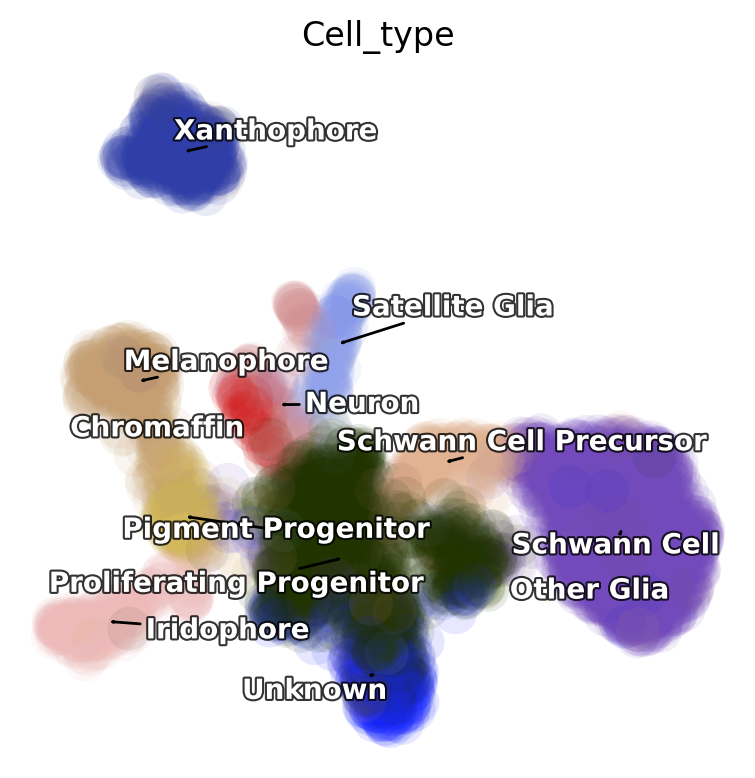

In [26]:
preprocessor.preprocess_adata_monocle(adata);
dyn.tl.reduceDimension(adata, basis="pca")
dyn.pl.umap(adata, color=celltype_key, figsize=(4,4),
           adjust_legend=True)

## Define customized preprocessor steps and integrate with existing preprocessor